# `01` Import Necessary Libraries

In [1]:
# warnings: This library is imported to suppress any warnings that might arise during the execution of the script
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns





# `02` Load Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

In [3]:
df_train.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
# check nulls
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- The output shows that there are no null values in any of the columns of the dataframe.


In [6]:
# Simple Statistical Analysis
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


- it seems that Age column  is   skewed but other columns are  normaly distributied  we will check later 😁😁

In [7]:
# Check for Duplicates
df_train.duplicated().sum()

0

- There are no duplicate records.

## `ii` Visual Analysis

In [8]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
cat_col=df_train.select_dtypes(include='object').columns

- show the relation btween target and categorical data

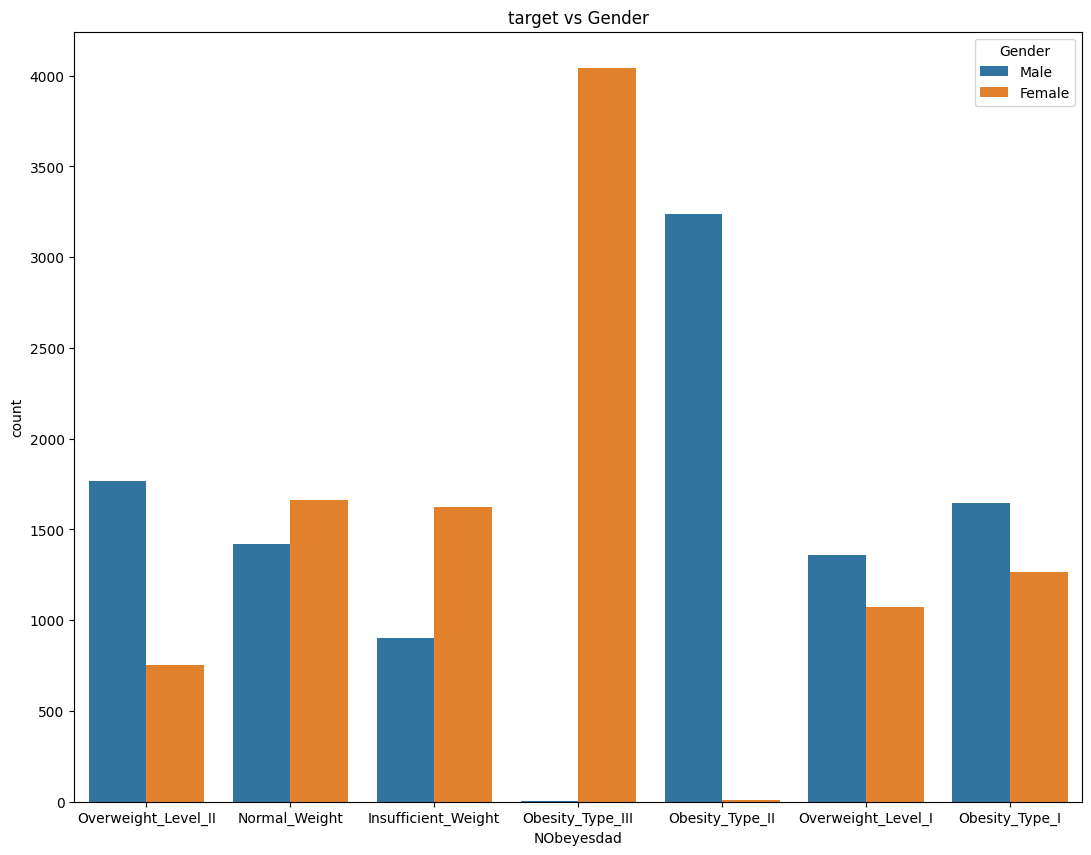

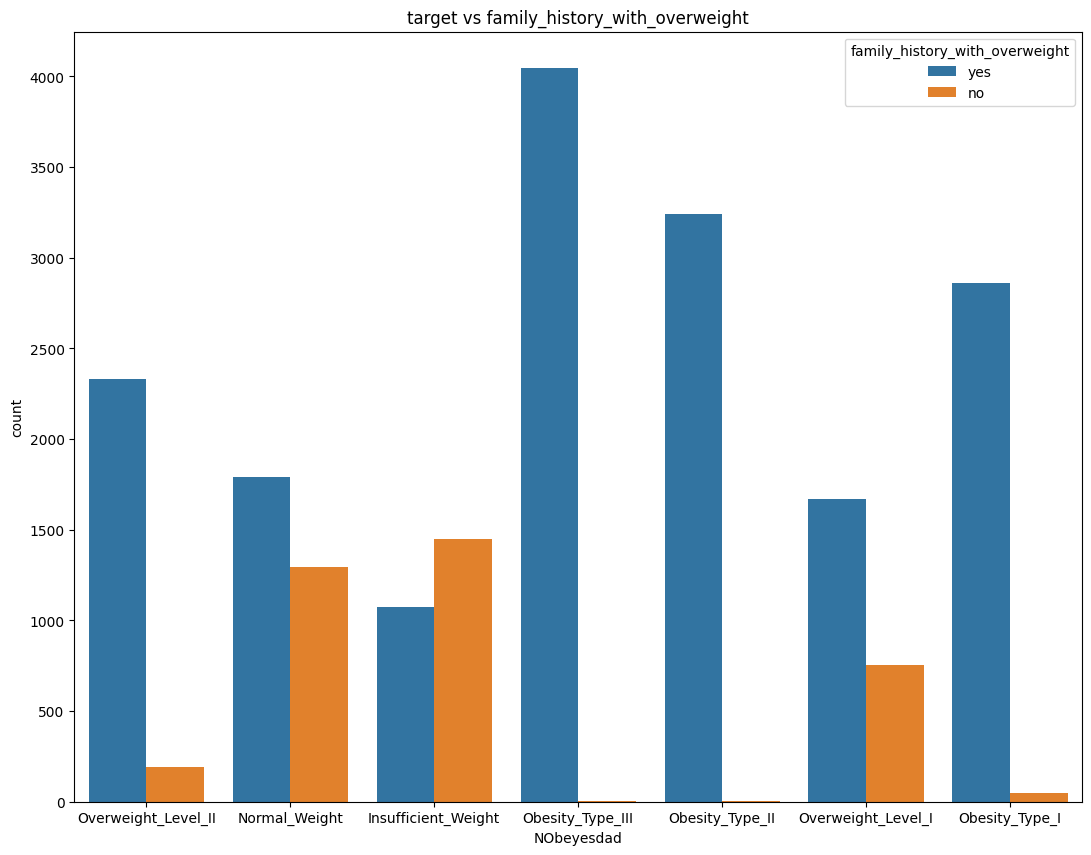

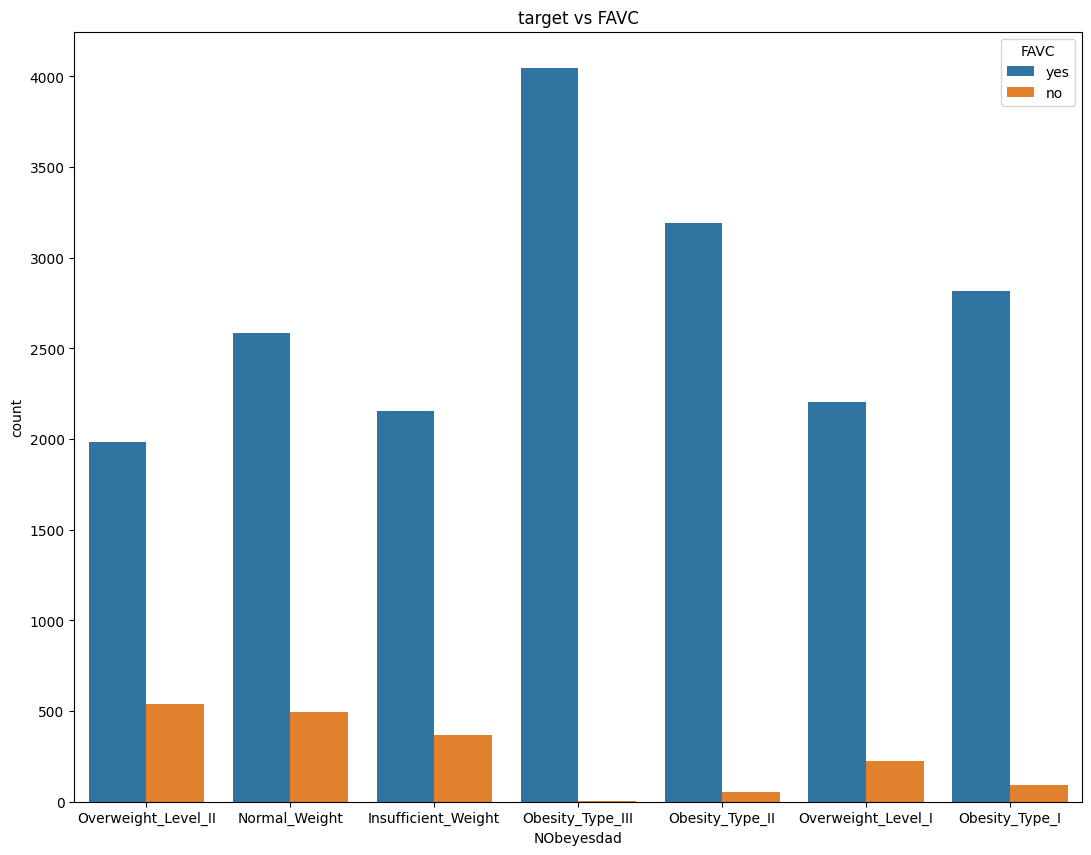

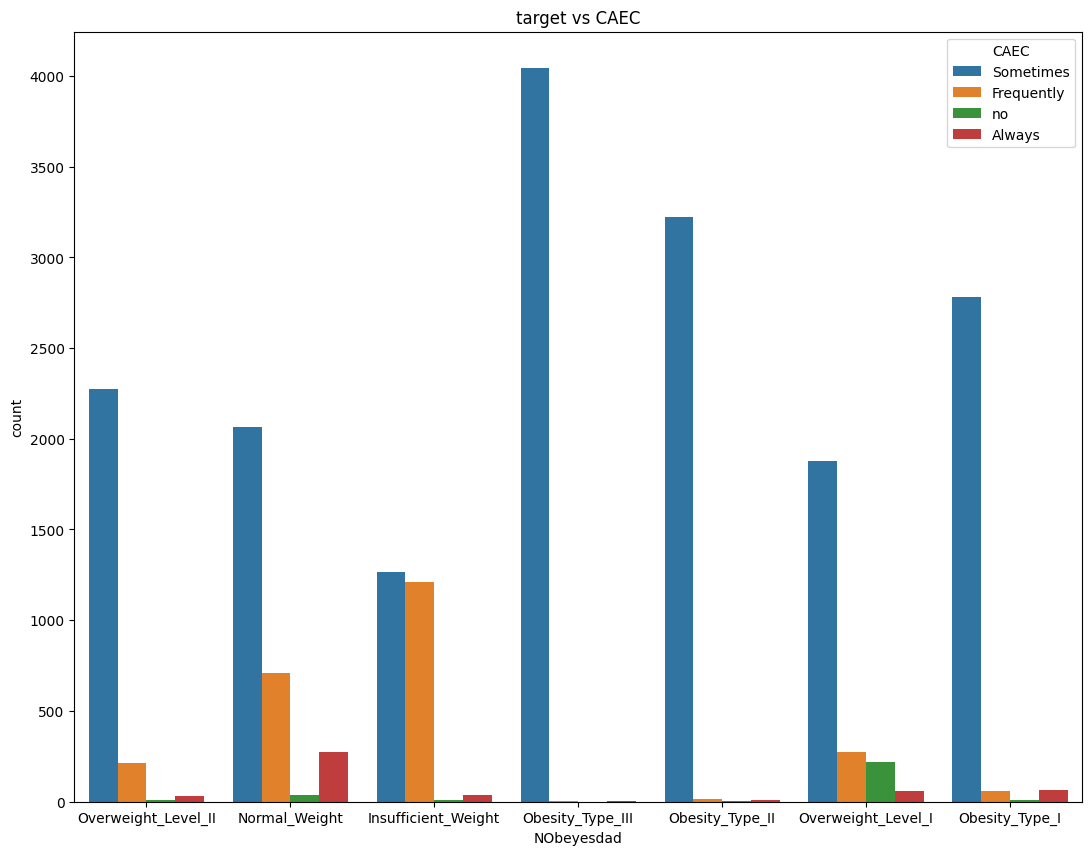

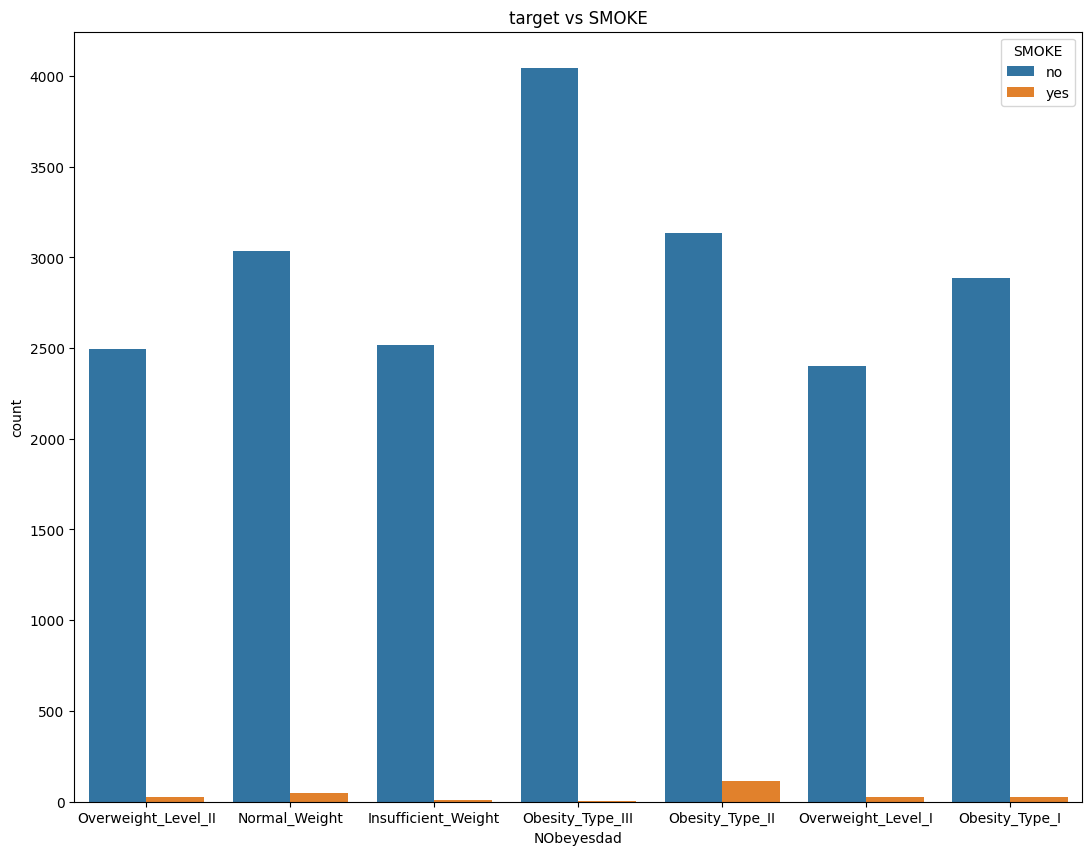

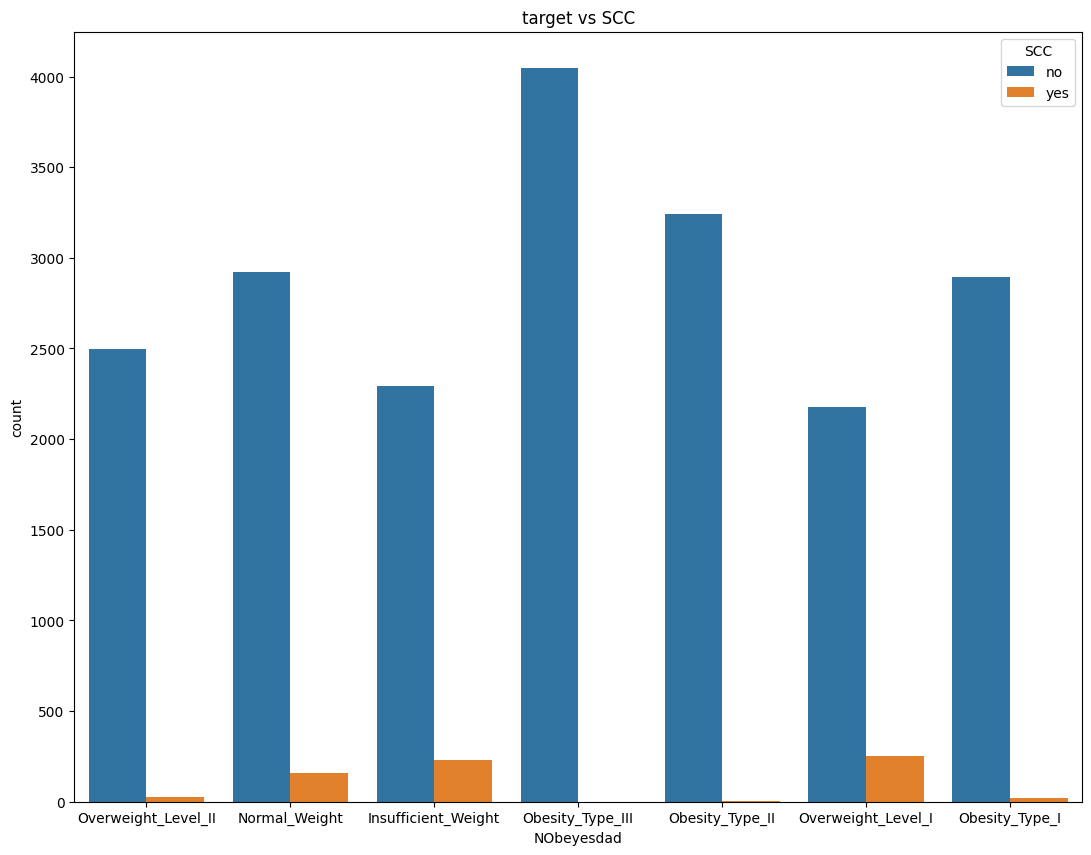

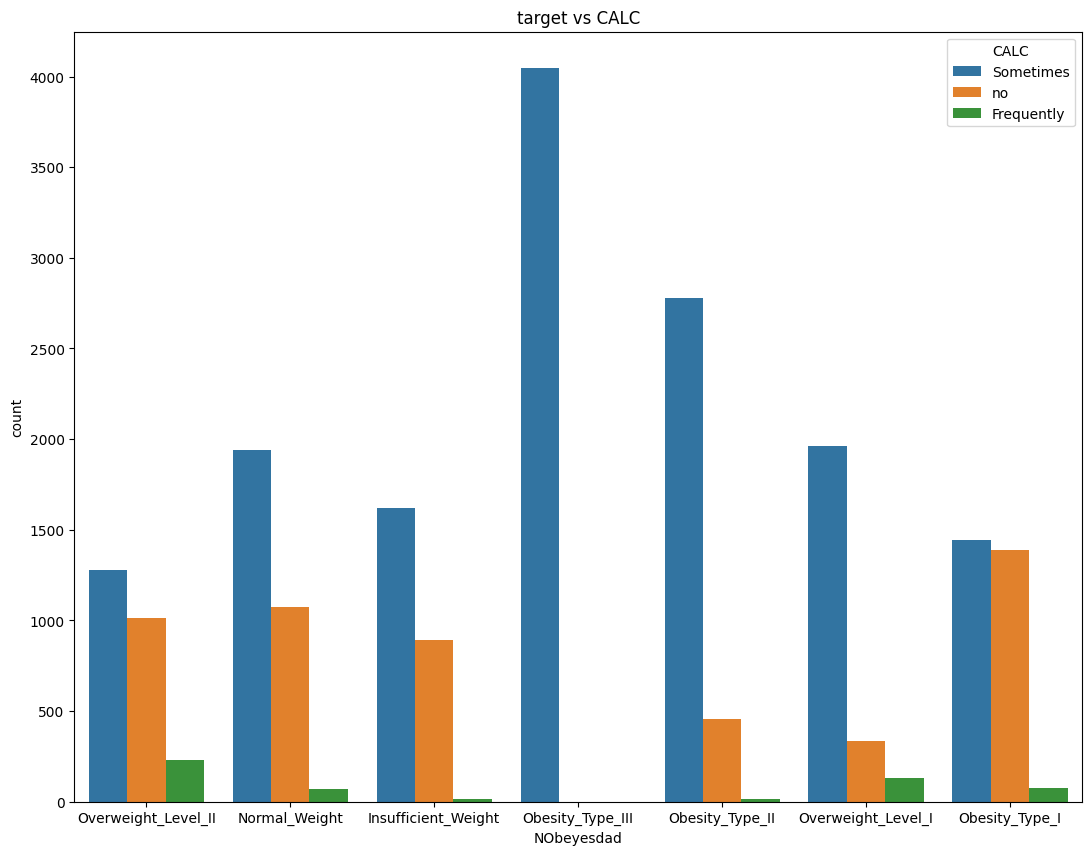

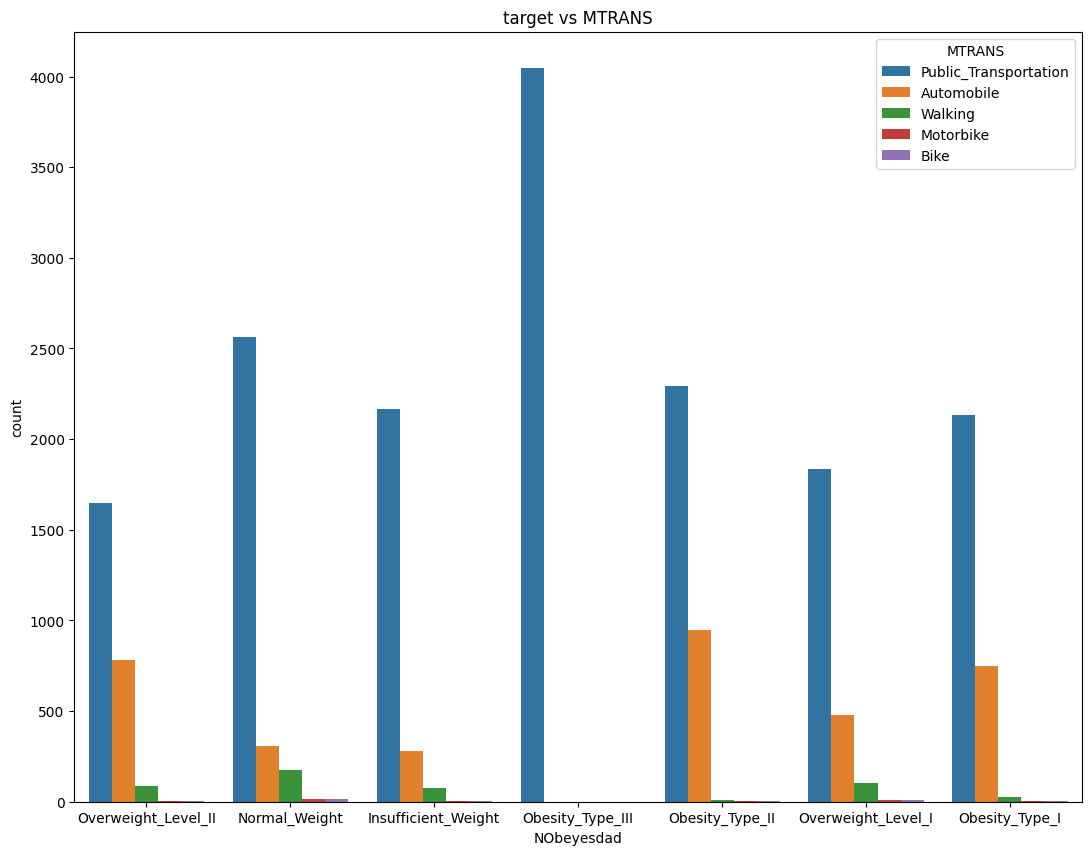

In [10]:
for col in  cat_col[:8] :
    plt.figure(figsize=(13,10))
    sns.countplot(df_train ,x='NObeyesdad',hue = col)
    plt.title(f"target vs {col}")

plt.show()

`From Above graphs , We Can See`

- All the People in Obesity_Type_II are Male and in Obesity_Type_III all are Female,From these point we can say that Gender is a important feature for the Obesity Prediction
- A significant majority of individuals with obesity types I, II, and III also report a family history of overweight. This suggests a potential correlation between family history and the occurrence of these specific obesity types and i see the same thing in FAVC espicialy in  Obesity_Type_III
- in CALC column we see that people who sometimes drink alcohol sufer from Obesity_Type_III and the same thing in MTRRANS  




In [11]:
num_col=['Age', 'Height', 'Weight']
num_col

['Age', 'Height', 'Weight']

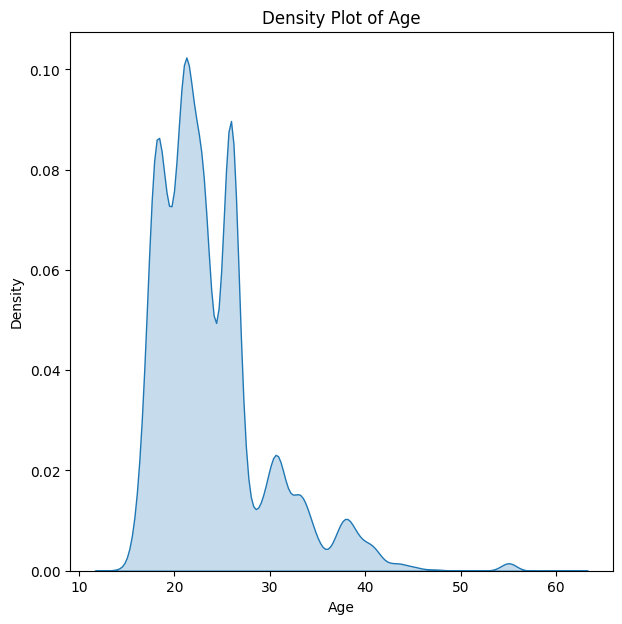

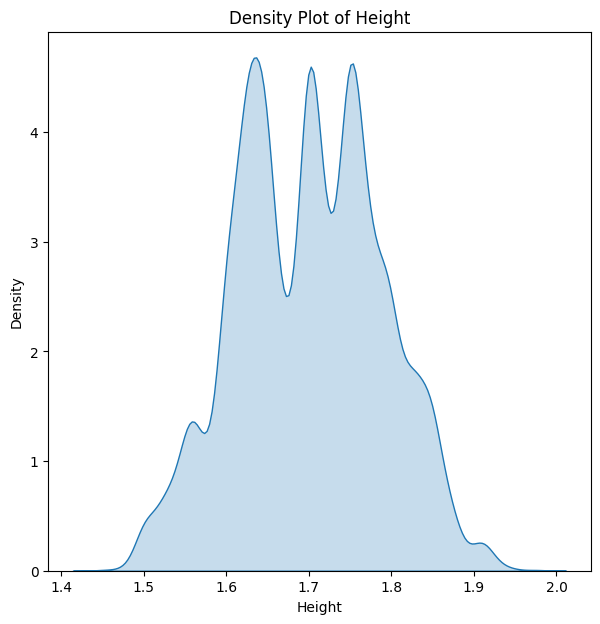

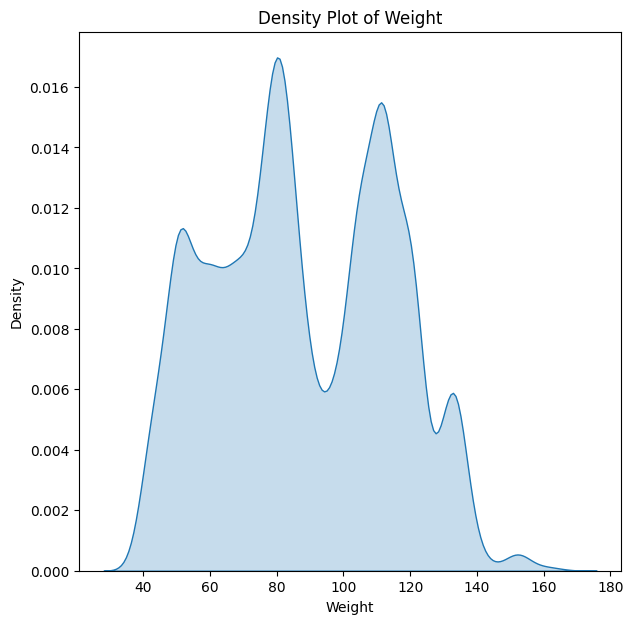

In [12]:
for col in  num_col :
    plt.figure(figsize=(7,7))
    sns.kdeplot(df_train[col], shade=True)
    plt.title(f'Density Plot of {col}')
plt.show()

- the 'Height' and 'Weight' seems Normal but Age skewed

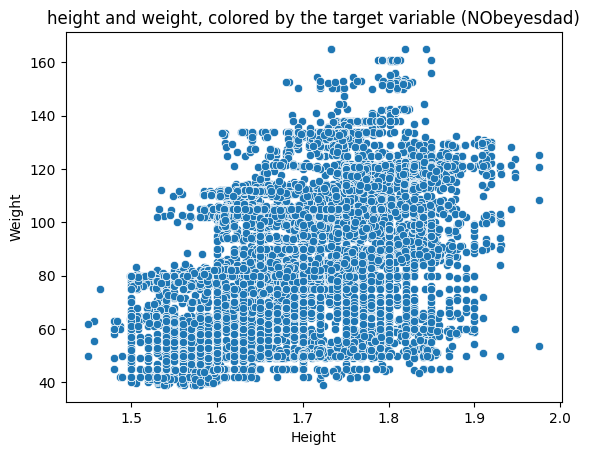

<Figure size 1500x1500 with 0 Axes>

In [26]:
sns.scatterplot(x='Height', y='Weight', data=df_train)
plt.title("height and weight, colored by the target variable (NObeyesdad)")
plt.figure(figsize=(15,15))
plt.show()

The graph shows the relationship between height and weight, colored by the target variable `NObeyesdad`.
 This can provide insights into how height and weight relate to the different obesity types.

- There appears to be a positive correlation between height and weight, meaning that taller individuals tend to be heavier.
- The plot also suggests that individuals with obesity types II and III tend to have higher weights compared to those with obesity type I.
- Additionally, there seems to be a cluster of individuals with obesity type III who have relatively shorter heights and higher weights.

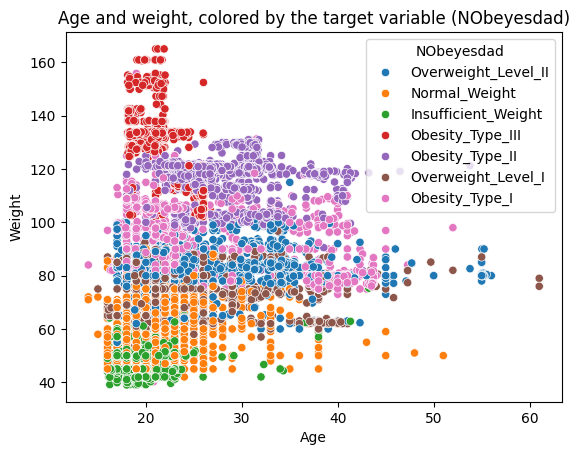

<Figure size 1500x1500 with 0 Axes>

In [14]:
sns.scatterplot(x='Age', y='Weight', hue='NObeyesdad', data=df_train)
plt.title("Age and weight, colored by the target variable (NObeyesdad)")
plt.figure(figsize=(15,15))
plt.show()

In [15]:
col=['FCVC', 'NCP','CH2O', 'FAF', 'TUE']

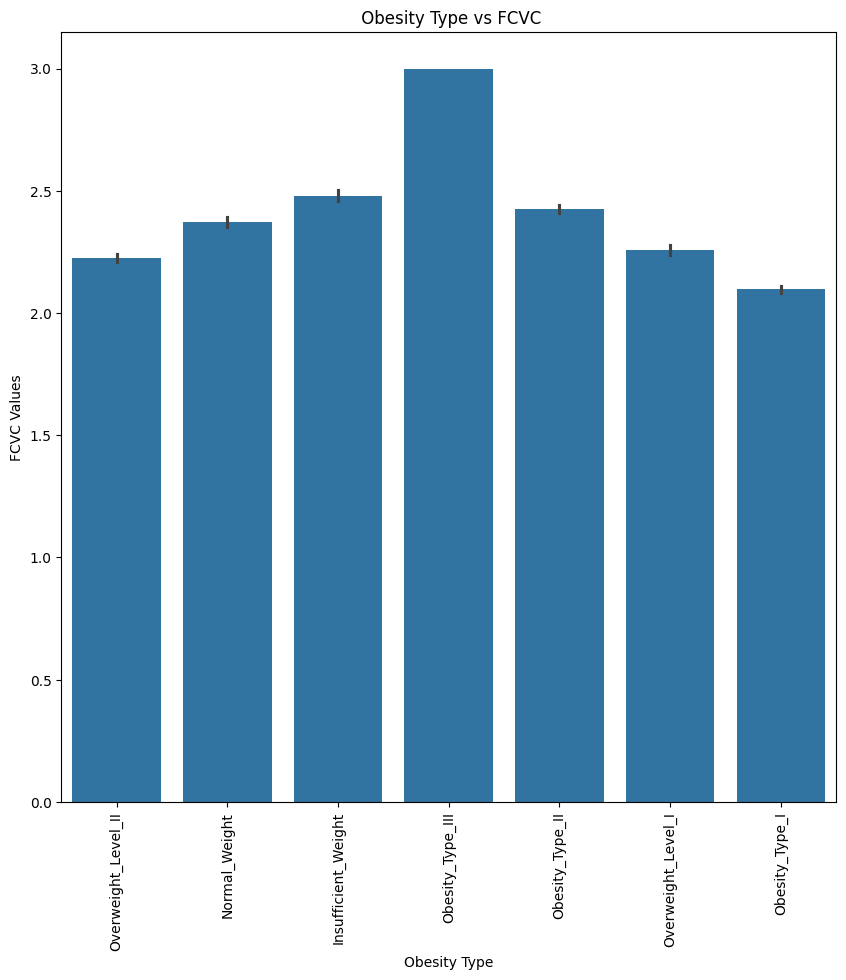

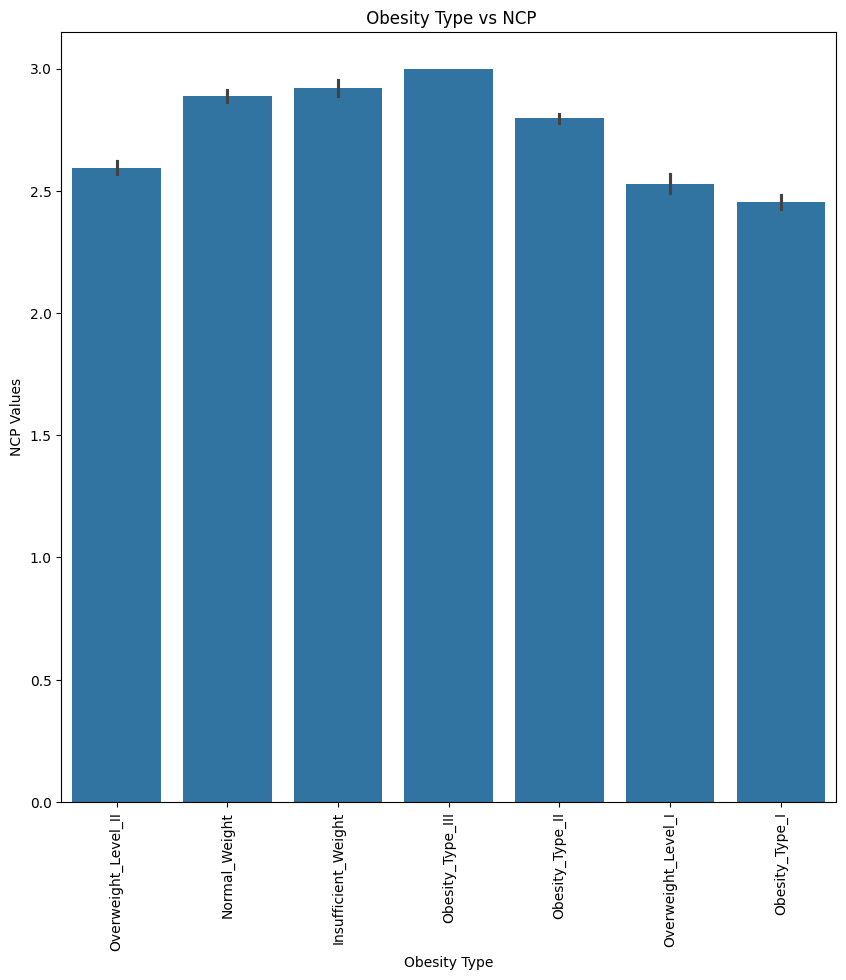

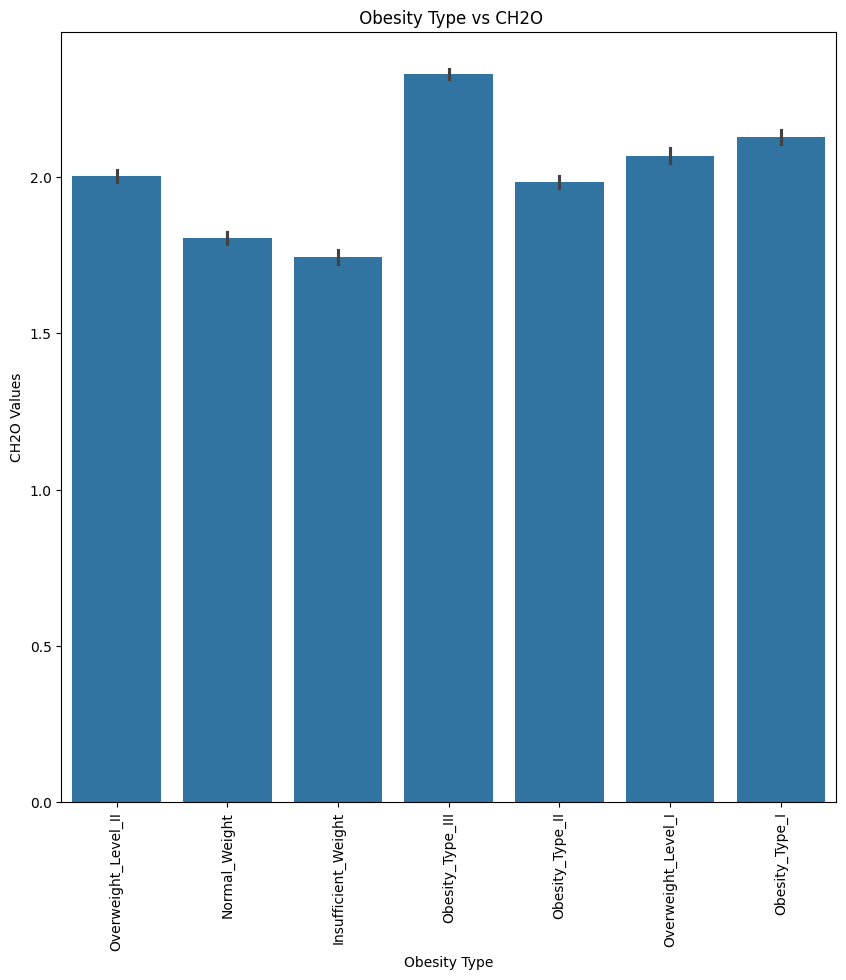

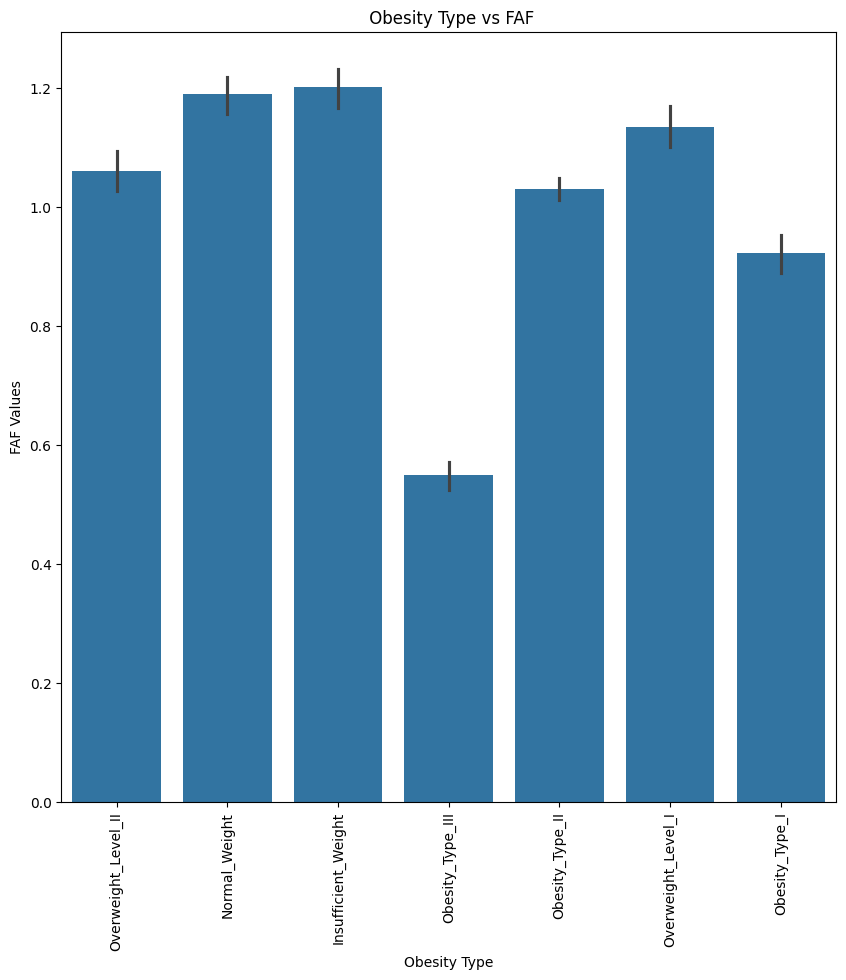

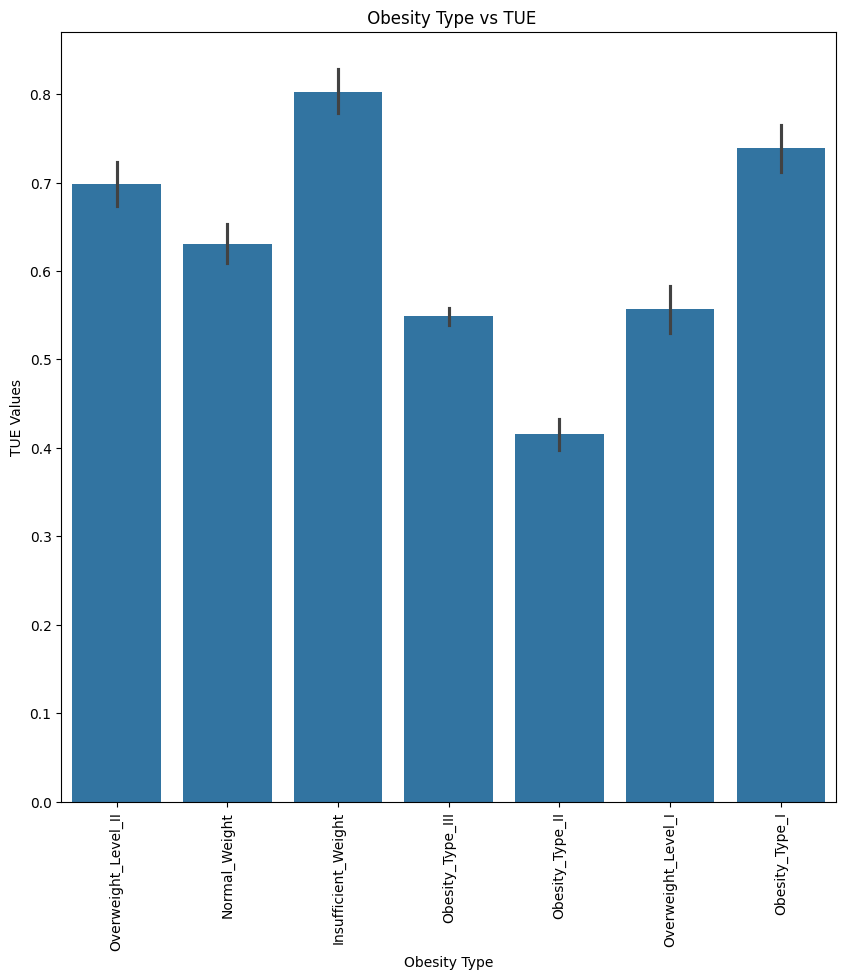

In [16]:
for i in col:
    plt.figure(figsize=(10,10))
    sns.barplot(x='NObeyesdad', y=i, data=df_train)
    plt.xticks(rotation=90)
    plt.xlabel('Obesity Type')
    plt.ylabel(f'{i} Values')
    plt.title(f' Obesity Type vs {i}')

plt.show()

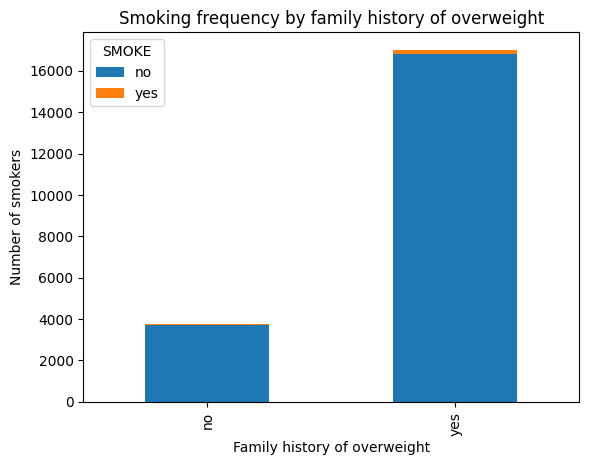

In [17]:
#  Smoking frequency by family history of overweight
df_train.groupby('family_history_with_overweight')['SMOKE'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Smoking frequency by family history of overweight')
plt.xlabel('Family history of overweight')
plt.ylabel('Number of smokers');

In [18]:
df_train_copy=df_train.copy()

In [19]:
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Apply the mapping to create a new column 'NObeyesdad_numeric'
df_train_copy['NObeyesdad_numeric'] = df_train_copy['NObeyesdad'].map(obesity_mapping)

In [20]:
df_train_copy.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_numeric
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,3
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,0


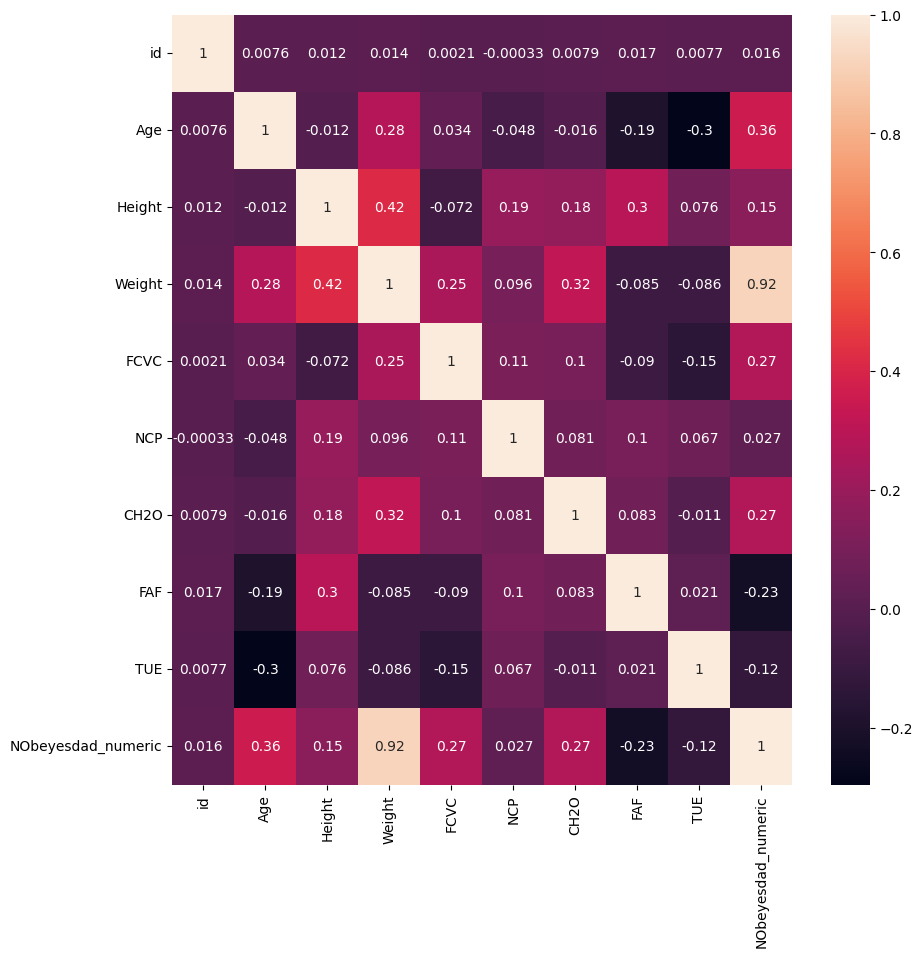

In [21]:
tmp = df_train_copy[df_train_copy.select_dtypes(exclude='object').columns].corr("pearson")
plt.figure(figsize=(10,10))
sns.heatmap(tmp,annot=True);